In [343]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [344]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
Input_data = pd.read_csv('/content/drive/MyDrive/CW Data - Machine Learning/Inputs data.csv')
X = np.array(Input_data)

In [346]:
Output_data= pd.read_csv('/content/drive/MyDrive/CW Data - Machine Learning/Output data.csv')
Y= np.array(Output_data)

In [347]:
T = Y[:,0]
T.shape

(1029,)

In [348]:
!cp /content/drive/MyDrive/ELM_for_Big_Data_Steels-main/elm.py /content

In [349]:
import elm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

In [350]:
stdsc = StandardScaler()
scaler = MinMaxScaler()

In [351]:
xtoy = stdsc.fit_transform(X)
scaler.fit(X)
xtoy= scaler.transform(X)

In [352]:
x_train, x_test, y_train, y_test = train_test_split(xtoy, T, test_size=0.4)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(617, 8) (617,) (412, 8) (412,)


In [353]:
model = elm.elm(hidden_units=10, activation_function='sigmoid', random_type='normal', x=x_train, y=y_train, C=100, elm_type='reg') 

# 11

In [361]:
beta, train_score, running_time = model.fit('solution1')
print("regression beta:\n", beta)
print("regression train score:", train_score)
print("regression running time:", running_time)

regression beta:
 [ -54.69988186  138.67355081 -253.75795788  380.51924591  127.38262194
 -213.52766583  188.44048779 -292.88225168   86.07896337   35.39244758]
regression train score: 10.510699122783167
regression running time: 0.000484000000000151


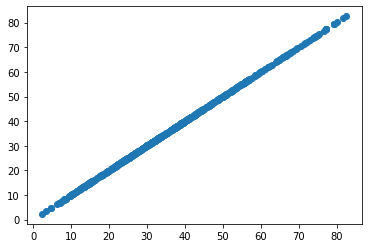

In [362]:
plt.scatter(model.y, y_train)

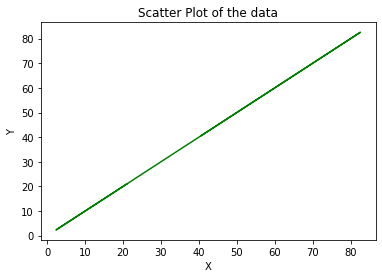

In [363]:
plt.plot(model.y, model.y,'g-')
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

regression result: [19.95815779 35.41197561 54.42794023 35.70945951 34.9321436  51.18936248
 25.30215359 35.7015677  20.06995052 26.92641958 41.47009075 36.17607118
 61.47913107 32.8260454  23.12081639 21.01056868 33.69314702 24.80397062
 25.88167511 18.10226091 22.73940481 42.84214259 18.19517531 26.66084685
 42.29983599 31.20199247 47.05828081 35.11735719 37.63422242 38.27785763
 35.64989216 44.65533676 23.35962248 40.07533651 39.06914418 62.68539639
 46.84964537 48.99517335 50.91943829 36.65345975 49.03591591 31.61062105
 32.92995112 51.53411573 38.06104232 27.28092441 26.79636699 23.59866762
 50.28082542 49.15016659 55.67372643 21.58976772 53.16930385 36.11009188
 44.17201316 46.00153343 25.82406749 51.41394453 20.43724131 40.82145874
 56.48969696 13.64480911 37.46595065 25.28771106 31.84367284 24.19164989
 51.91613482 35.6907406  41.50968794 36.0511098  53.08950659 52.97203124
 23.39311964 12.89183075 24.17890531 20.02397187 25.67612761 40.43710802
 27.69177273 12.13859343 41.0527

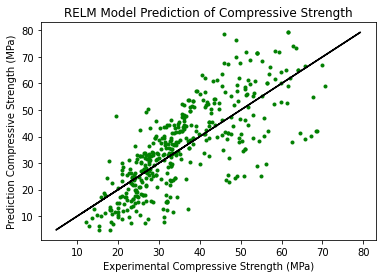

In [364]:
prediction = model.predict(x_test)
# Printing results
print("regression result:", prediction.reshape(-1, ))
print("regression score:", model.score(x_test, y_test))
model.y

plt.scatter(prediction, y_test, marker='.', color='green')
plt.plot(y_test, y_test, 'black')
plt.title("RELM Model Prediction of Compressive Strength")
plt.xlabel("Experimental Compressive Strength (MPa)")
plt.ylabel("Prediction Compressive Strength (MPa)")
print(model.y.shape, y_test.shape)

In [365]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import sqrt

# sa

In [359]:
mse = mean_squared_error(y_test, prediction)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

MSE: 113.29
RMSE: 10.64
r2 Score Of Test Set : 0.5806589557193038


In [360]:
y_predict = model.predict(x_train)

mse = mean_squared_error(y_train, y_predict)
print(f"r2 Score Of Train Set : {r2_score(y_train, y_predict)}")
print("MSE: %.2f" % mse)
print("RMSE of train: %.2f" % sqrt(mse))

r2 Score Of Train Set : 0.6080044886876473
MSE: 110.47
RMSE of train: 10.51
